# Analyse et Prévision d'une série chronologiques avec Python cours 1ere annee AEM

###  ⏳ <font color = 'red'> Aperçu</font>

1. 1. Ce projet contient une série de modèles d'analyse, de transformation et de prévision fréquemment utilisés lorsqu'il s'agit de traiter des séries chronologiques. L'objectif de ce référentiel est de montrer comment modéliser des séries temporelles à partir de zéro, pour cela nous utilisons un vrai dataset de cas d'utilisation (dataset sur la pollution atmosphérique de Pékin)

# 📂 <font color = 'red'> Dataset </font>

Le dataset utilisé est l'ensemble de données public sur la qualité de l'air de Pékin. Cet ensemble de données contient des données de pollution de 2014 à 2019 échantillonnées toutes les 10 minutes ainsi que des caractéristiques météorologiques supplémentaires telles que la pression, la température, etc. 

#  📚 <font color = 'red'> Analyses et Transformations</font>
* <font color = 'blue'> Décomposition de séries temporelles</font>
    * <font color = 'green'> Level</font>
    * <font color = 'green'>Trend</font>
    * <font color = 'green'>Seasonality</font>
    * <font color = 'green'>Noise</font>
* <font color = 'blue'>Stationnarité</font>
    * <font color = 'green'>AC & PAC plots</font>
    * <font color = 'green'>Moyenne mobile & écart-type</font>
    * <font color = 'green'>Test de Dickey-Fuller</font>




#  📐 <font color = 'red'>  Modèles testés</font>
* <font color = 'blue'>Autoregression (AR)</font>
* <font color = 'blue'>Moving Average (MA)</font>
* <font color = 'blue'>Autoregressive Moving Average (ARMA)</font>
* <font color = 'blue'>Autoregressive integraded moving average (ARIMA)</font>
* <font color = 'blue'>Seasonal autoregressive integrated moving average (SARIMA)</font>

# Exploratory data analysis 

#### <font color = 'blue'> Importing Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
import warnings
from sklearn.linear_model import LinearRegression
import itertools
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

#### <font color = 'blue'> Load the dataset and quick preview</font>

In [2]:
air_dataset = pd.read_csv('../input/air-pollution-dataset/air_pollution.csv')
air_dataset.head()

,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [3]:
air_dataset.describe()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


#### <font color = 'blue'> Plotting -Air Pollution- as a feature value</font>

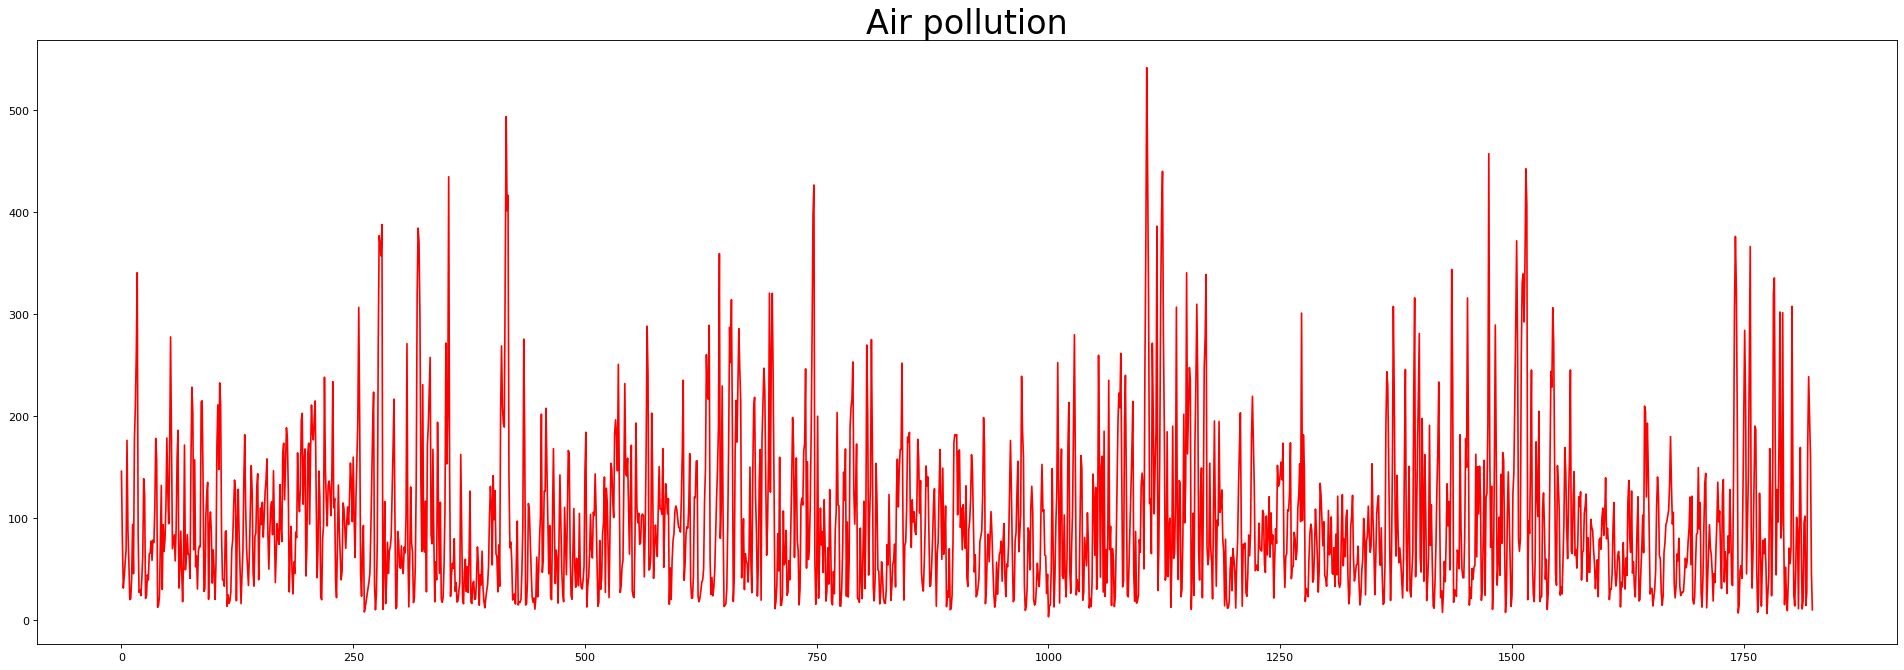

In [4]:
plt.figure(figsize=(30, 10), dpi = 80)
plt.title('Air pollution', fontsize=30)

plt.plot(air_dataset.pollution_today, color='red')

# Decomposing the time series 

L'une des analyses les plus courantes pour les séries chronologiques consiste à les décomposer en plusieurs parties. Les parties en lesquelles nous pouvons diviser une série temporelle sont : niveau, tendance, saisonnalité et bruit, toutes les séries contiennent le niveau et le bruit mais la saisonnalité et la tendance ne sont pas toujours présentes (il y aura plus d'analyse pour ces deux parties).

Ces 4 parties peuvent se combiner de manière additive ou multiplicative dans la série chronologique.

#### * Modèle additif
##### <font color = 'red'>y(t) = Level + Trend + Seasonality + Noise</font>
#### * Modèle multiplicatif
####  <font color = 'red'>y(t) = Level * Trend * Seasonality * Noise</font>



Les modèles multiplicatifs sont non linéaires, la tendance est courbe et la saisonnalité n'est pas constante. Le changement n'est pas constant dans le temps

La décomposition est utilisée pour analyser la série chronologique. Identifiez chacune des différentes parties de la série chronologique et son comportement, chacune des composantes peut affecter vos modèles de différentes manières.

La plupart des séries chronologiques sont une combinaison d'un modèle additif et d'un modèle multiple, il est difficile d'identifier les séries chronologiques du monde réel dans un seul modèle.

#### Automatic time series decomposition
La bibliothèque python Statsmodel fournit une fonction <font color = 'green'>seasonal_compose()</font> pour décomposer automatiquement une série temporelle

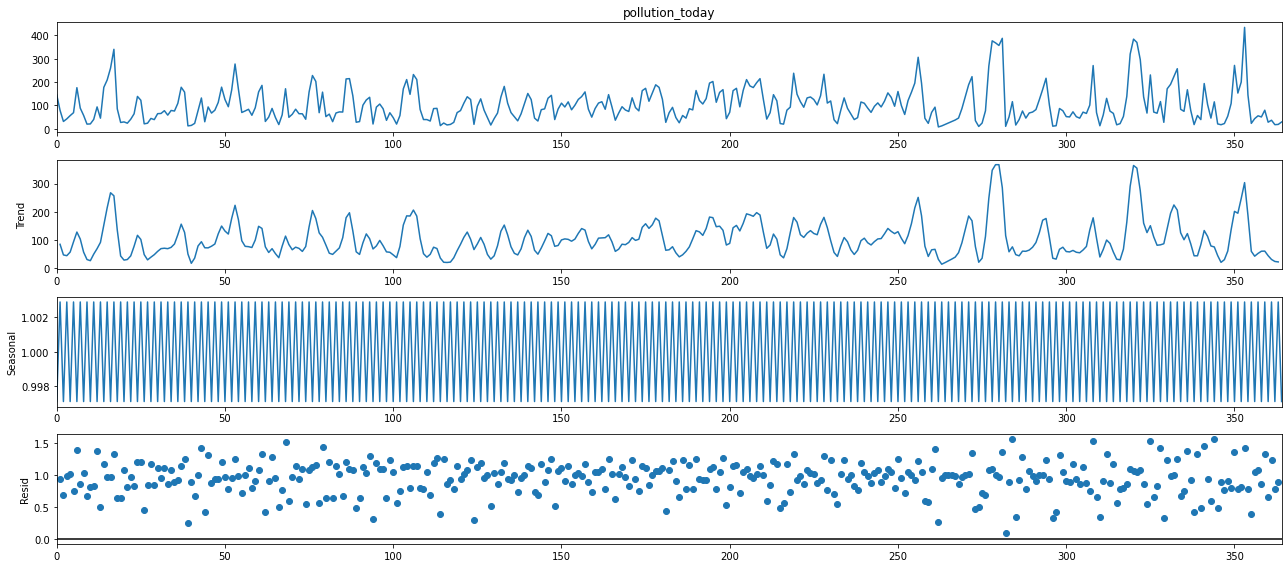

<Figure size 5600x2400 with 0 Axes>

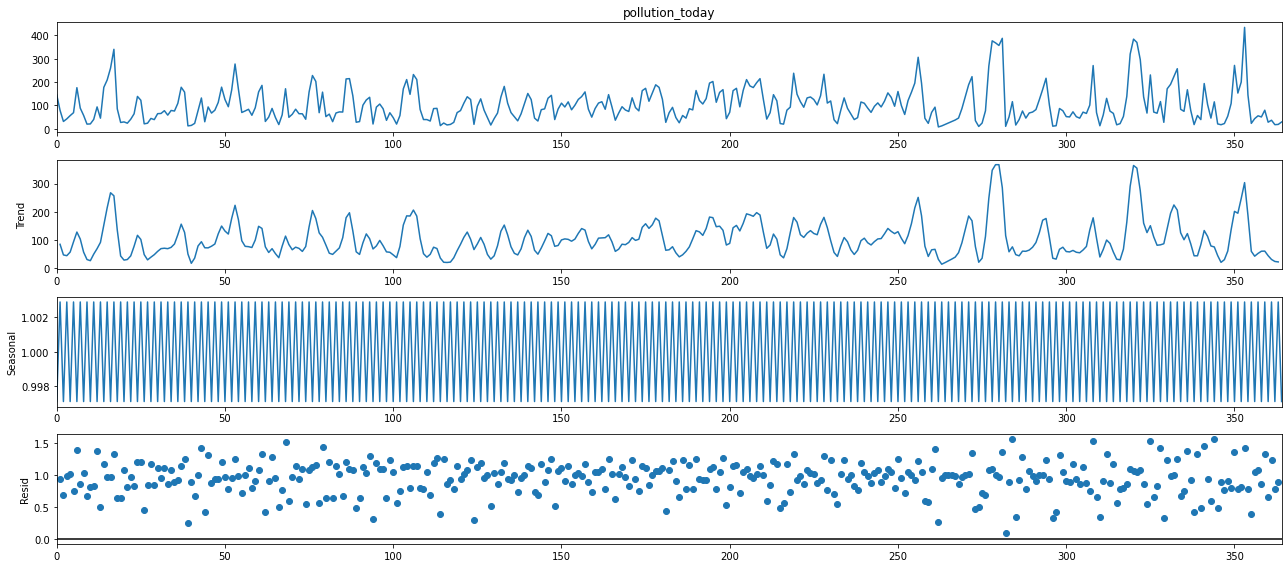

In [5]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(70, 30), dpi=80)
ser = air_dataset.pollution_today[:365]
res = seasonal_decompose(ser, model='multiplicative', period = 2)
res.plot()

#### Trend
Une tendance 'Trend' est observée lorsqu'une pente croissante ou décroissante est observée dans la série chronologique. Une tendance est une tendance lisse, générale, à long terme, moyenne. Il n'est pas toujours nécessaire que l'augmentation ou la diminution soit dans la même direction tout au long de la période de temps donnée.
There is several methods to check for trend in our serie :
* The trend plot defined by pyhton
* Fit a linear regression model to identify trend


#### <font color = 'red'>The trend plot defined by pyhton</font>

<AxesSubplot:>

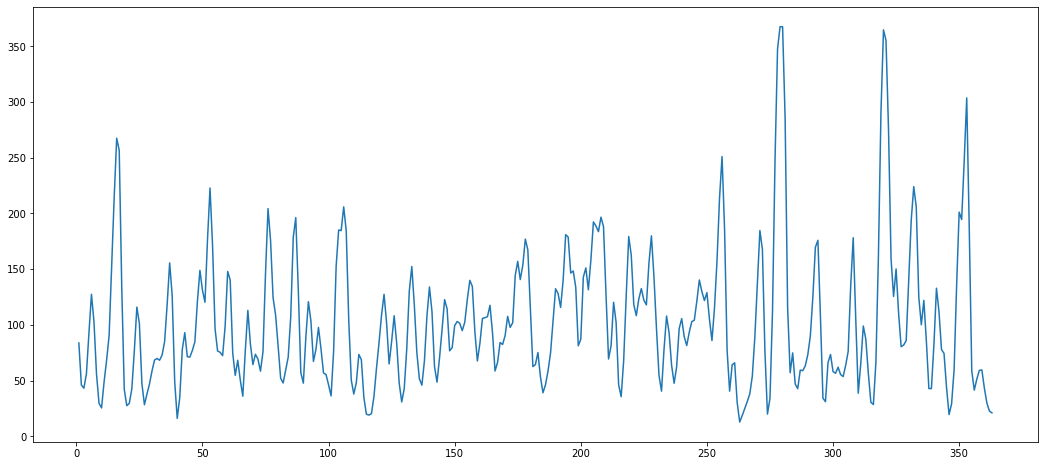

In [6]:
res.trend.plot()

#### <font color = 'red'>Trend fitted by linear regression</font>

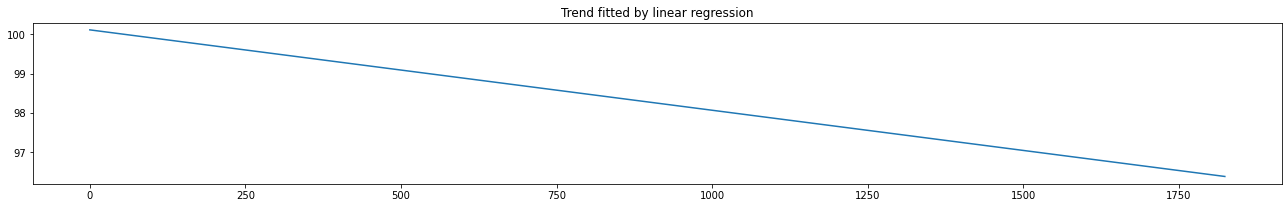

In [7]:
layout = (3, 2)

fit = plt.subplot2grid(layout, (2, 0), colspan=2)

X = [i for i in range(0, len(air_dataset.pollution_today))]
X = np.reshape(X, (len(X), 1))
y = air_dataset.pollution_today.values

model = LinearRegression()
model.fit(X, y)

trend = model.predict(X)
fit.plot(trend)
fit.set_title("Trend fitted by linear regression")

plt.tight_layout()

#### Seasonality
La saisonnalité est observée lorsqu'il existe un modèle répété distinct observé entre des intervalles réguliers en raison de facteurs saisonniers. Cela peut être dû au mois de l'année, au jour du mois, aux jours de la semaine ou même à l'heure de la journée.

Commençons par la première année des données

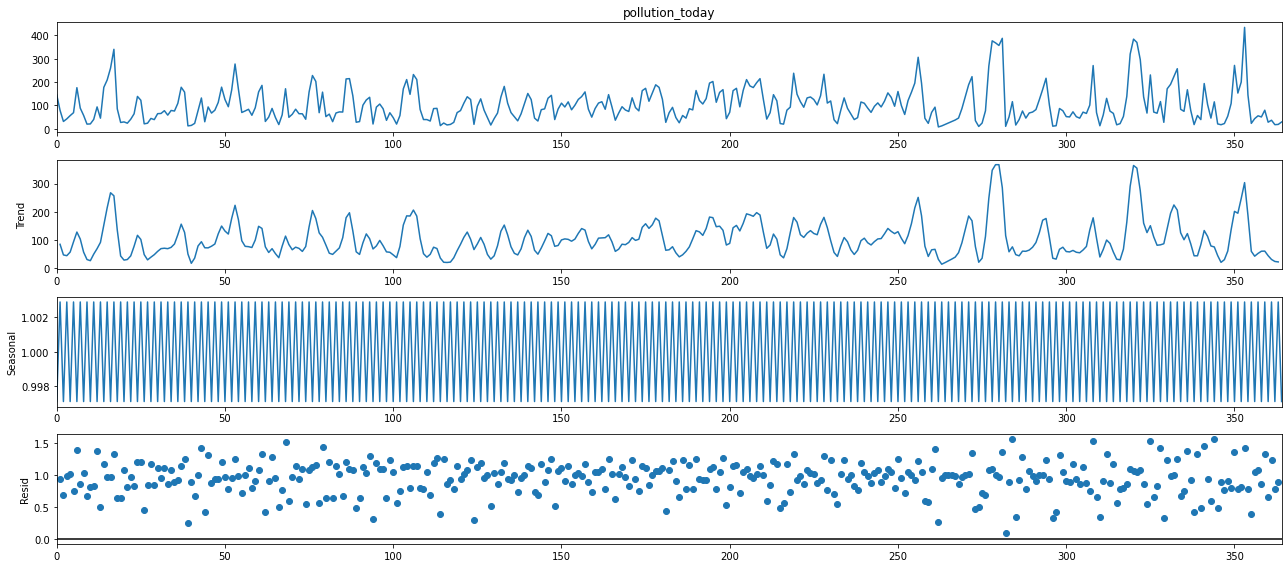

<Figure size 4000x1600 with 0 Axes>

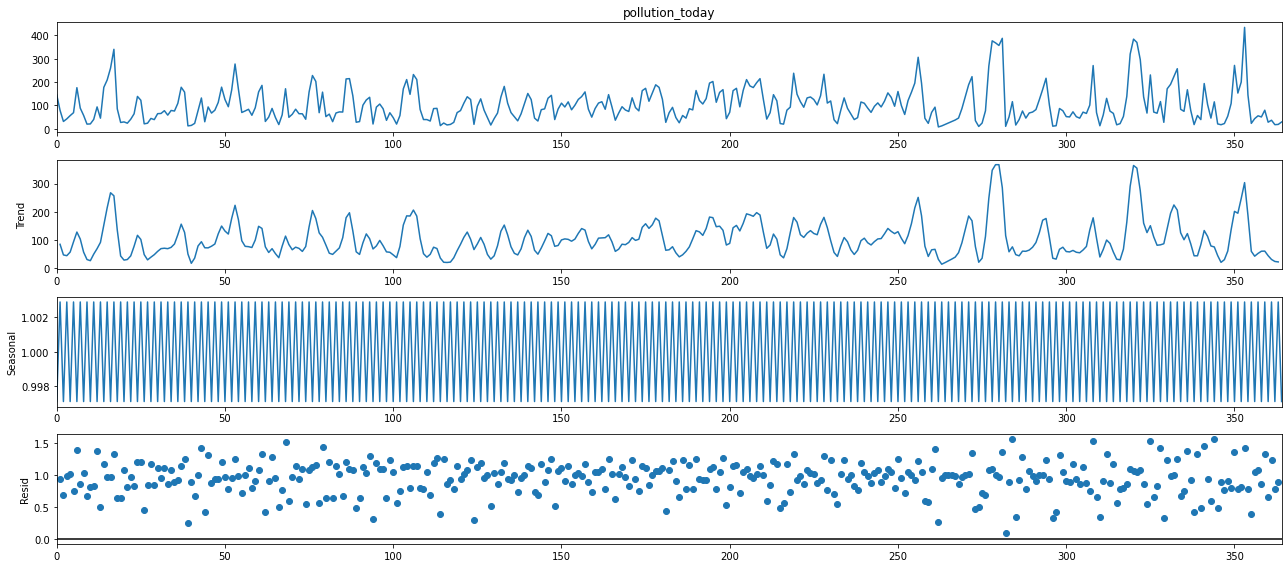

In [8]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = air_dataset.pollution_today[:365]
result = seasonal_decompose(series, model='multiplicative', period = 2)
result.plot()

#### Méthodes manuelles pour trouver les saisonnalités
Nous pouvons également essayer de générer un modèle pour trouver les saisonnalités pour nous. L'un des modèles les plus couramment utilisés est un modèle polynomial simple.

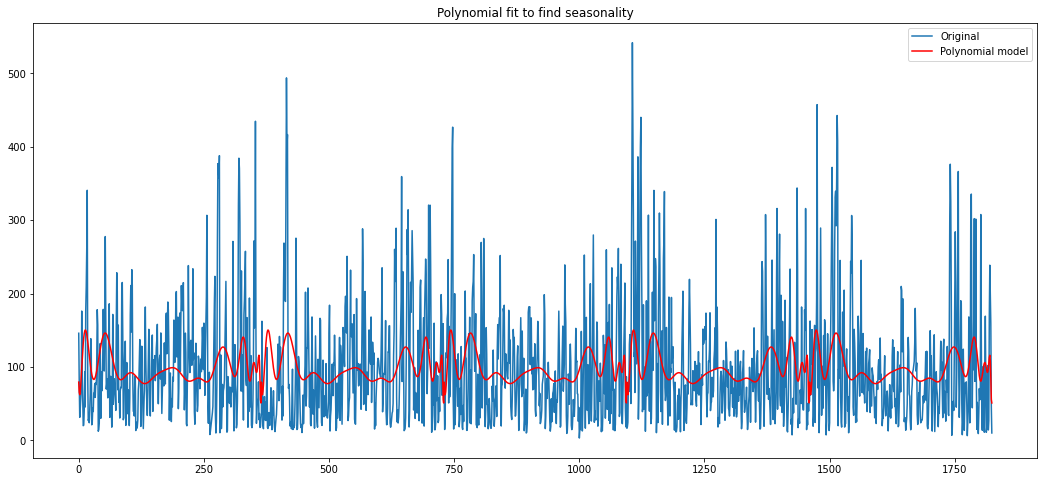

In [9]:
ser = air_dataset.pollution_today.values
X = [i % 365 for i in range(0, len(ser))]
y = ser
deg = 100
coefficients = np.polyfit(X, y, deg)

# Create curve
curve = list()
for i in range(len(X)):
    val = coefficients[-1]
    for d in range(deg):
        val += X[i]**(deg-d) * coefficients[d]
    curve.append(val)
    
# Plotting time !
plt.plot(ser, label='Original')
plt.plot(curve, color='red', label='Polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

#### Noise component

Nos séries chronologiques auront également une composante de bruit, très probablement du bruit blanc. On dit qu'un bruit blanc est présent si les mesures sont indépendantes et identiquement distribuées avec une moyenne de zéro. Cela signifie que toutes nos mesures ont la même variance et aucune corrélation avec le reste des valeurs de la série.

Comment vérifier si notre série a du bruit blanc ?
* Consultez notre histogramme de série, cela ressemble-t-il à une distribution gaussienne ? Moyenne=0 et un écart-type consatnt
* Graphiques de corrélation
* Distribution d'écart type, est-ce une distribution gaussienne ?
* La moyenne ou le niveau change-t-il avec le temps ?


Text(0.5, 1.0, 'Mean over time')

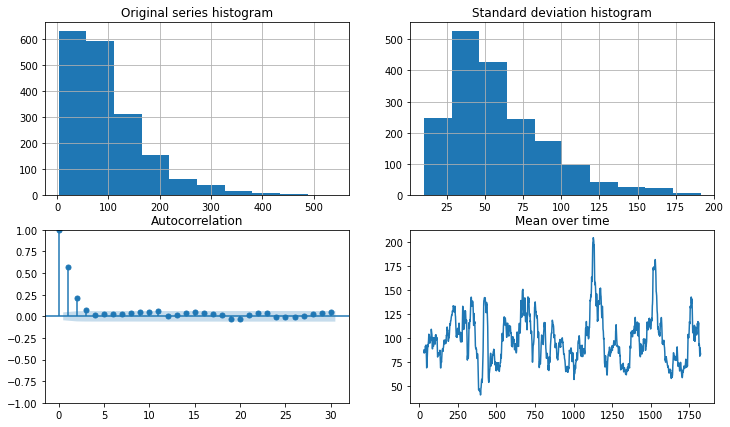

In [10]:
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist = plt.subplot2grid(layout, (0, 0))
ac = plt.subplot2grid(layout, (1, 0))
hist_std = plt.subplot2grid(layout, (0, 1))
mean = plt.subplot2grid(layout, (1, 1))

air_dataset.pollution_today.hist(ax=hist)
hist.set_title("Original series histogram")

plot_acf(ser, lags=30, ax=ac)
ac.set_title("Autocorrelation")

sdh = air_dataset.pollution_today.rolling(7).std()
sdh.hist(ax=hist_std)
hist_std.set_title("Standard deviation histogram")

mot = air_dataset.pollution_today.rolling(30).mean()
mot.plot(ax=mean)
mean.set_title("Mean over time")

##### Nous pouvons voir que notre série ne suit pas une distribution gaussienne à partir de l'histogramme et ni l'écart type, bien que la norme ait la moyenne plus centrée qui montre une petite partie de bruit blanc qu'il n'est pas possible de séparer de la série d'origine (cela va se produisent la plupart du temps, en particulier les ensembles de données de la vie réelle)).

##### Nous avons également une petite corrélation avec des mesures proches dans le temps mais pas présentes avec des mesures distantes (cela pourrait également indiquer une faible saisonnalité). La moyenne dans le temps montre également quelque chose de similaire avec une valeur constante et des pics élevés aux mêmes moments pour les 4 années

##### <font color ='green'>On pourrait dire que notre série contient une petite partie de bruit blanc mais c'est vraiment petit et difficile à éliminer</font>

#### Stationarity
La stationnarité est une caractéristique importante des séries chronologiques. Une série chronologique est stationnarité si elle a une moyenne et une variance constantes dans le temps. La plupart des modèles ne fonctionnent qu'avec des données stationnaires, car cela facilite la modélisation. Toutes les séries temporelles ne sont pas stationnaires, mais nous pouvons les transformer en séries stationnaires de différentes manières.

#### Vérifier la stationnarité

#### <font color = 'red'>Graphiques d'autocorrélation et d'autocorrélation partielle</font>

Les graphiques d'autocorélation montrent comment les valeurs au temps t sont corrélées avec les valeurs suivantes au temps t+1,t+2,..t+n. Si les données ne sont pas stationnaires, les valeurs d'autocorrélation seront fortement corrélées avec des points distants dans le temps montrant des saisonnalités ou des tendances possibles.

Les valeurs d'autocorrélation des séries stationnaires diminueront rapidement au cours du temps t. Cela nous montre qu'aucune information n'est reportée dans le temps et que la série doit alors être constante dans le temps.

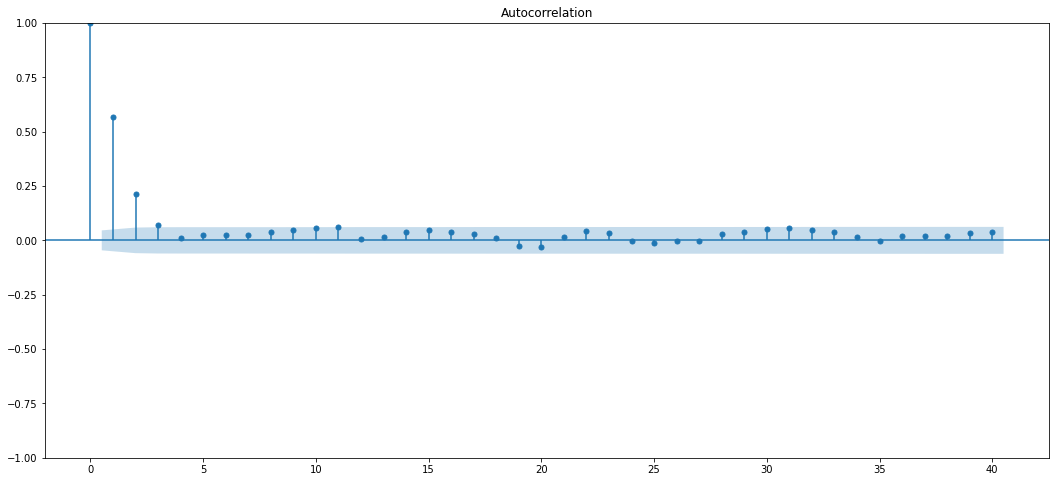

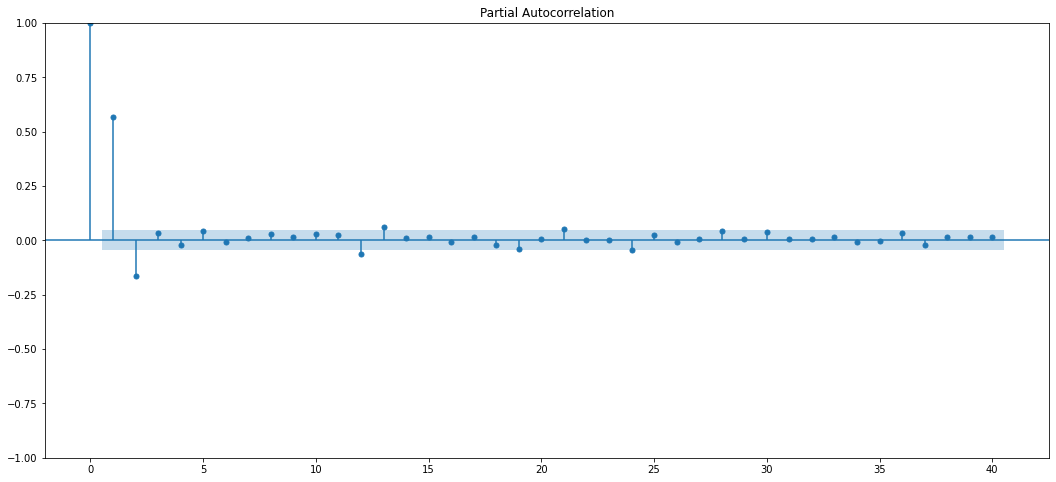

In [11]:
plot_acf(ser, lags=40)
plot_pacf(ser, lags=40)
plt.show()

# Rolling means and standard deviation
Nous parlions de la façon dont notre moyenne et notre écart type devraient être constants dans le temps afin d'avoir une série temporelle stationnaire, pourquoi ne pas simplement tracer ces deux propriétés ?

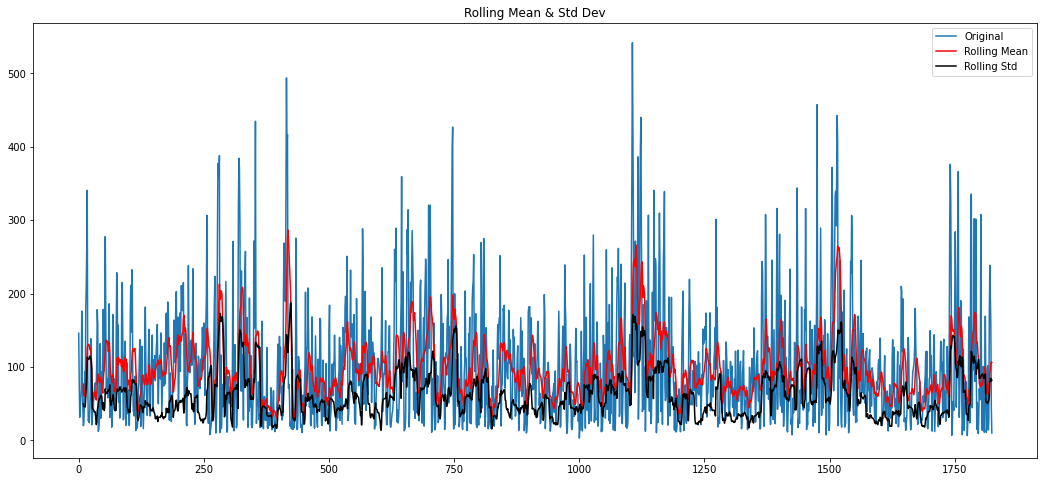

In [12]:
# Rolling statistics
rm = air_dataset.pollution_today.rolling(window=10).mean()
rs = air_dataset.pollution_today.rolling(window=10).std()

# Plotting time ! 
orig = plt.plot(air_dataset.pollution_today, label='Original')
mean = plt.plot(rm, color='red', label='Rolling Mean')
std = plt.plot(rs, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Std Dev')
plt.show()

<font color = 'black'>Nous pouvons voir comment notre moyenne et notre écart-type ont un comportement constant au fil des ans, même s'ils changent au cours de l'année, ce comportement se répète ensuite l'année suivante. Cela nous prouve à nouveau une série stationnaire</font>

<font color ='green'>Pour être plus sûr de notre stationnarité, nous allons implémenter le test de Dickey-Fuller augmenté</font>

# Augmented Dickey-Fuller test

Le test de Dickey-Fuller augmenté est un type de test statistique appelé test de racine unitaire. L'intuition derrière un test de racine unitaire est qu'il détermine à quel point une série chronologique est définie par une tendance. Il existe un certain nombre de tests de racine unitaire et l'Augmented Dickey-Fuller est peut-être l'un des plus largement utilisés. Il utilise un modèle autorégressif et optimise un critère d'information sur plusieurs valeurs de décalage différentes.

L'hypothèse nulle du test est que la série temporelle peut être représentée par une racine unitaire, qu'elle n'est pas stationnaire (a une structure dépendante du temps). L'hypothèse alternative (rejetant l'hypothèse nulle) est que la série chronologique est stationnaire.

<font color ='red'>Hypothèse nulle (H0)</font> : si elle n'est pas rejetée, cela suggère que la série chronologique a une racine unitaire, ce qui signifie qu'elle est non stationnaire. Il a une structure dépendante du temps.

<font color ='red'>Hypothèse alternative (H1)</font> : L'hypothèse nulle est rejetée ; cela suggère que la série chronologique n'a pas de racine unitaire, ce qui signifie qu'elle est stationnaire. Il n'a pas de structure dépendante du temps. Nous interprétons ce résultat en utilisant la valeur p du test. Une valeur p inférieure à un seuil (comme 5 % ou 1 %) suggère que nous rejetons l'hypothèse nulle (stationnaire), sinon une valeur p supérieure au seuil suggère que nous ne rejetons pas l'hypothèse nulle (non stationnaire).

<font color ='red'>Valeur de p > 0,05</font> : échec du rejet de l'hypothèse nulle (H0), les données ont une racine unitaire et sont non stationnaires. 

<font color ='red'>p-value inf ou = à 0,05</font> : rejeter l'hypothèse nulle (H0), les données n'ont pas de racine unitaire et sont stationnaires. 

In [13]:
X = air_dataset.pollution_today.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for k, val in result[4].items():
    print('\t%s: %.3f' % (k, val))

ADF Statistic: -10.116719
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Text(0.5, 1.0, 'Time Series stationary analysis Plots\n Dickey-Fuller: p=0.00000 Result: We reject stationarity')

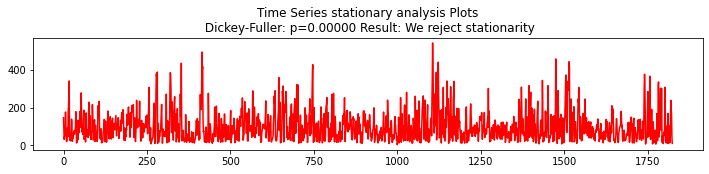

In [14]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
ts = plt.subplot2grid(layout, (0, 0), colspan=2)
y = pd.Series(y)
y.plot(ax=ts, color='red')
p_value = sm.tsa.stattools.adfuller(y)[1]
hypothesis_result = "We reject stationarity" if p_value <= 0.05 else "We can not reject stationarity"
ts.set_title(
    
    'Time Series stationary analysis Plots\n Dickey-Fuller: p={0:.5f} Result: {1}'.format(p_value, hypothesis_result))


<font color ='blue'> Cela confirme la stationnarité de notre série</font>

# Time Serie Forcasting
Il existe de nombreuses méthodes que nous pouvons utiliser pour la prévision des séries chronologiques et il n'y a pas de gagnant clair. 

La sélection du modèle doit toujours dépendre de l'apparence de vos données et de ce que vous essayez d'accomplir.

Certains modèles peuvent être plus robustes contre les valeurs aberrantes, mais fonctionnent moins bien que les plus sensibles et pourraient toujours être le meilleur choix en fonction du cas d'utilisation.

Lorsque vous examinez vos données, la principale division est de savoir si nous avons des régresseurs (caractéristiques) supplémentaires pour notre série chronologique ou simplement la série. Sur cette base, nous pouvons commencer à explorer différentes méthodes de prévision et leurs performances dans différentes métriques.

#### Prepare data before modeling

In [15]:
import os
import pandas as pd

prediction = {}

# Chargement des données
air_dataset = pd.read_csv('/kaggle/input/air-pollution-dataset/air_pollution.csv', parse_dates=['date'])
air_dataset.set_index('date', inplace=True)

# Split des données
split_date = '2014-01-01'
df_train = air_dataset.loc[air_dataset.index <= split_date]
df_test = air_dataset.loc[air_dataset.index > split_date]

print(f"{len(df_train)} days of training data \n{len(df_test)} days of testing data")

# Création du dossier de sortie
output_dir = '/kaggle/working/aire-pollution-traintest'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarde des fichiers
df_train.to_csv(os.path.join(output_dir, 'train.csv'))
df_test.to_csv(os.path.join(output_dir, 'test.csv'))


1461 days of training data 
364 days of testing data


# <font color = 'red'>Autoregression (AR)</font>

La méthode autorégressive (AR) modélise l'étape suivante de la séquence comme une fonction linéaire des observations à des étapes de temps antérieures. Paramètres du modèle :
* <font color = 'green'>Number of AR (Auto-Regressive) terms (p)</font>: p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [16]:
predictionsDict={}
index = len(df_train)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train)+t]
    model = AutoReg(temp_train.pollution_today, lags=8)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['AR'] = yhat.values

100%|██████████| 364/364 [00:04<00:00, 84.11it/s]


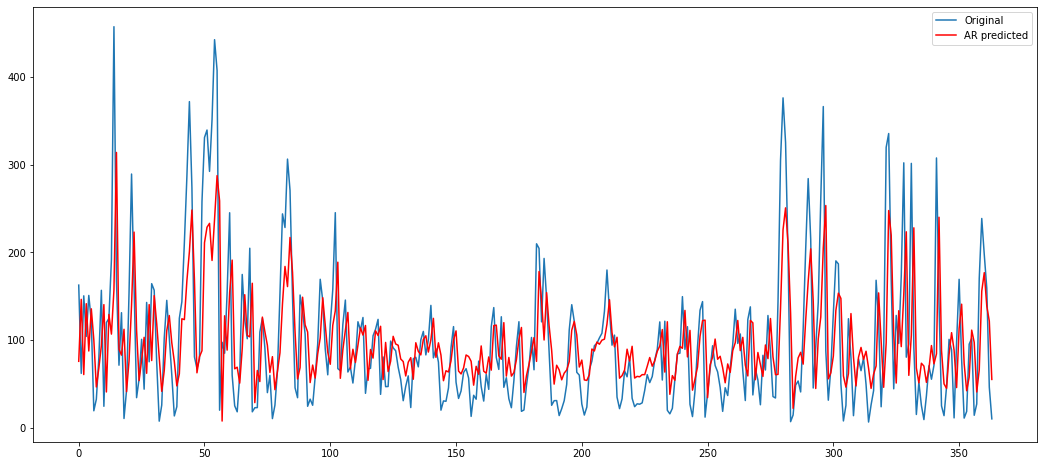

In [17]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()

# <font color = 'red'>Autoregressive integrated moving average (ARIMA)</font>
Dans un modèle ARIMA, 3 paramètres sont utilisés pour aider à modéliser les principaux aspects d'une série chronologique : la saisonnalité, la tendance et le bruit. Ces paramètres sont étiquetés p,d et q.

    * Nombre de termes AR (Auto-Régressif) (p) : p est le paramètre associé à l'aspect auto-régressif du modèle, qui intègre les valeurs passées, c'est-à-dire les décalages de la variable dépendante. Par exemple, si p vaut 5, les prédicteurs de x(t) seront x(t-1)….x(t-5).
    * Nombre de différences (d) : d est le paramètre associé à la partie intégrée du modèle, qui affecte la quantité de différenciation à appliquer à une série chronologique.
    * Nombre de termes MA (moyenne mobile) (q) : q est la taille de la fenêtre de la partie moyenne mobile du modèle, c'est-à-dire les erreurs de prévision retardées dans l'équation de prédiction. Par exemple, si q vaut 5, les prédicteurs de x(t) seront e(t-1)….e(t-5) où e(i) est la différence entre la moyenne mobile au ième instant et la valeur réelle.


In [18]:
index = len(df_train)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train)+t]
    model = ARIMA(temp_train.pollution_today, order=(1, 0, 0))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['ARIMA'] = yhat.values

100%|██████████| 364/364 [00:34<00:00, 10.65it/s]


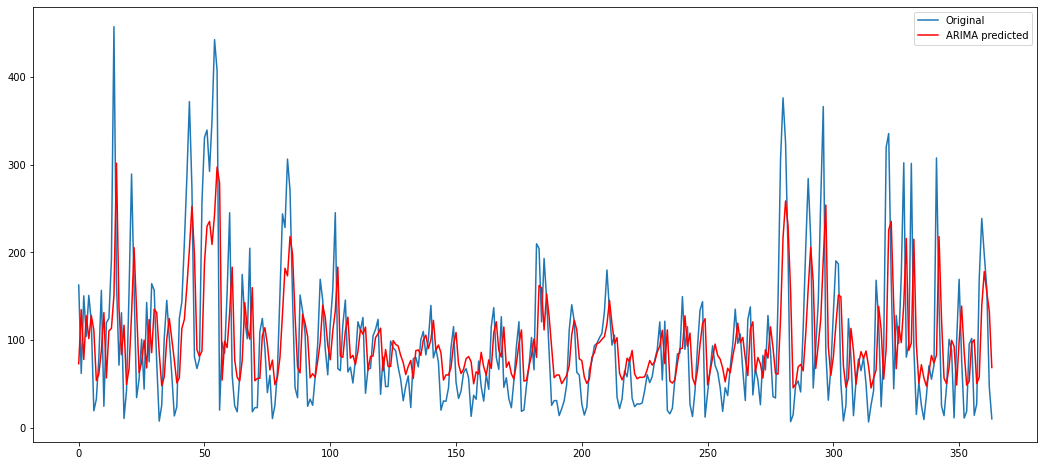

In [19]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='ARIMA predicted')
plt.legend()

# <font color = 'red'>Seasonal Autoregressive Integrated Moving-Average (SARIMA)</font>
La moyenne mobile intégrée autorégressive saisonnière, SARIMA ou ARIMA saisonnière, est une extension d'ARIMA qui prend explicitement en charge les données de séries chronologiques univariées avec une composante saisonnière.

Il ajoute trois nouveaux hyperparamètres pour spécifier l'autorégression (AR), la différenciation (I) et la moyenne mobile (MA) pour la composante saisonnière de la série, ainsi qu'un paramètre supplémentaire pour la période de la saisonnalité.

#### <font color = 'blue'>Trend Elements:</font>
Il y a trois éléments de tendance qui nécessitent une configuration. Ce sont les mêmes que le modèle ARIMA, à savoir :
* p : Ordre autorégressif de tendance.
* d : ordre de différence de tendance.
* q : ordre de moyenne mobile de tendance.

#### <font color = 'blue'>Seasonal Elements:</font>
Il y a quatre éléments saisonniers qui ne font pas partie d'ARIMA qui doivent être configurés, ils sont:
* P : Ordre autorégressif saisonnier.
* D : ordre de différence saisonnière.
* Q : Ordre moyen mobile saisonnier.
* m : Le nombre de pas de temps pour une seule période saisonnière. Par exemple, un S de 12 pour les données mensuelles suggère un cycle saisonnier annuel.


In [20]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(np.log(air_dataset),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [22]:
index = len(df_train)
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train)+t]
    model = sm.tsa.statespace.SARIMAX(temp_train.pollution_today, order=(
        1, 0, 0), seasonal_order=(0, 0, 0, 3))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['SARIMAX'] = yhat.values

100%|██████████| 364/364 [00:17<00:00, 20.37it/s]


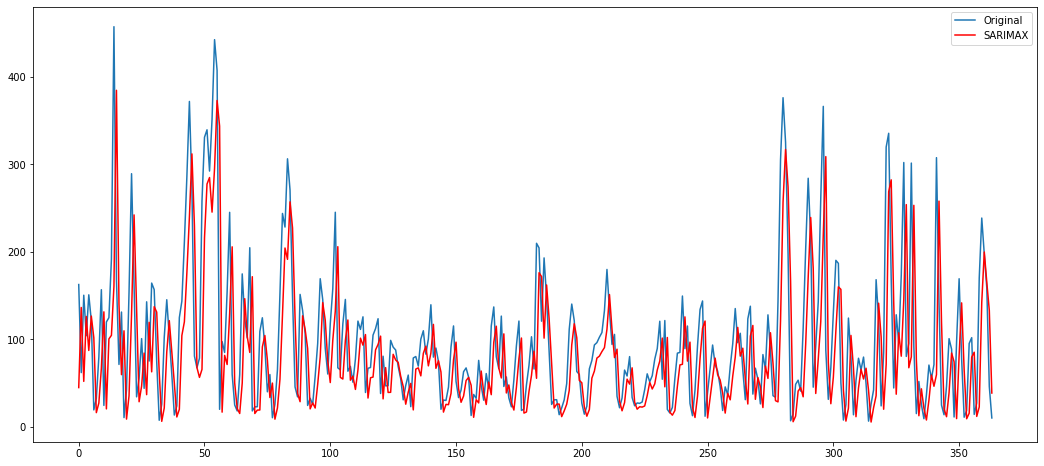

In [23]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()

#### Nous devons toujours exécuter des diagnostics de modèle pour enquêter sur tout comportement inhabituel.

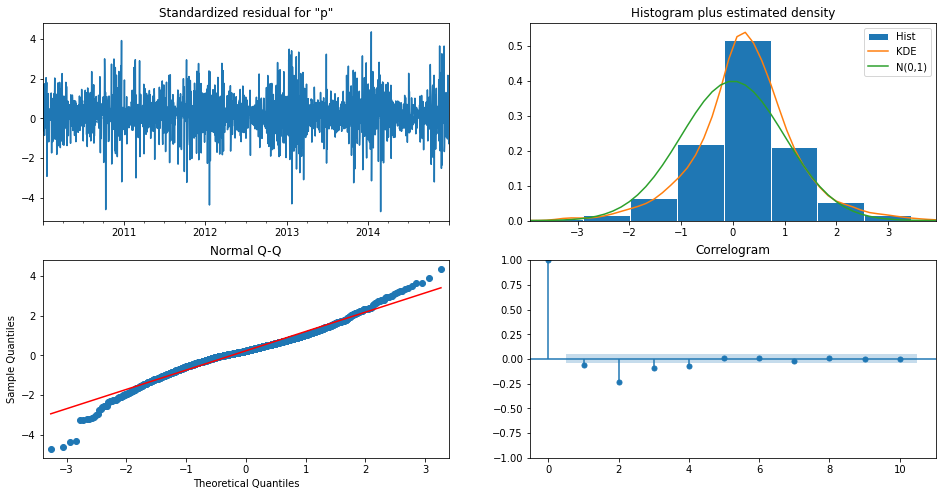

In [24]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts
Pour nous aider à comprendre l'exactitude de nos prévisions, nous comparons les pollutions prévues aux celles réelles de la série chronologique, et nous définissons les prévisions pour commencer au 01/01/2014 jusqu'à la fin des données.

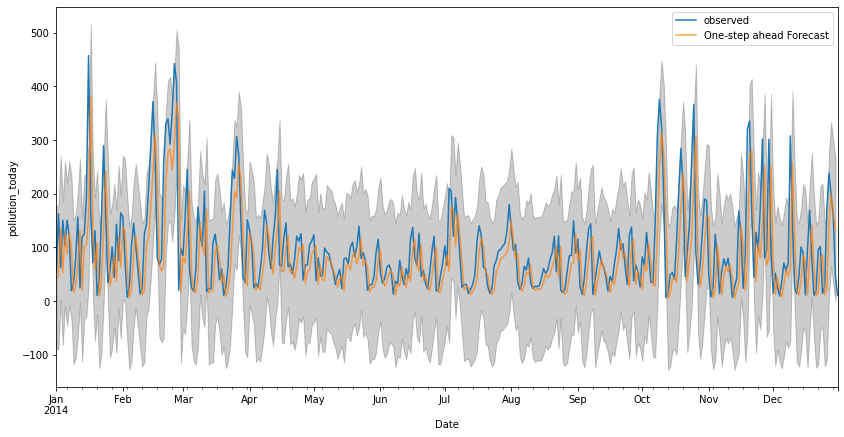

In [25]:
pred = model_fit.get_prediction(start = pd.to_datetime('2014-01-01'), dynamic = False)
pred_ci = pred.conf_int()

y = air_dataset['pollution_today']

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('pollution_today')
plt.legend()
plt.show()


##### Dans l'ensemble, nos prévisions s'alignent très bien sur les vraies valeurs, montrant une tendance à la hausse à partir du début de l'année et capturant la saisonnalité vers la fin de l'année.

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]

mse = ((y_forecasted-y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5077.08


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 71.25


En statistique, l'erreur quadratique moyenne (MSE) d'un estimateur mesure la moyenne des carrés des erreurs, c'est-à-dire la différence quadratique moyenne entre les valeurs estimées et ce qui est estimé. L'EQM est une mesure de la qualité d'un estimateur — il est toujours non négatif, et plus l'EQM est petit, plus nous nous rapprochons de la droite de meilleur ajustement.
L'erreur quadratique moyenne (RMSE) nous indique que notre modèle a pu prévoir les pollutions quotidiennes moyennes dans l'ensemble de test à moins de 66.24 des pollutions réelles. 

##### Suite à l'exclusion des modèles MA et ARMA du python (après plusieurs recherches sans resultat), nous avons décidé de les implementer sur le logiciel R.

<font color ='red'>NB : J'ai pas pu réaliser le modèle ARMA ni sur R ni sur python, j'ai décidé donc d'écrire le programme correspondant avec python mais biensur avec ARIMA(1,0,1) d=0 juste pour avoir une idée</font>

##### Les resultats sont comme suit : 

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import pandas as pd

index = len(df_train)
yhat = list()

for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = air_dataset[:len(df_train) + t]
    
    model = ARIMA(temp_train.pollution_today, order=(1, 0, 1))  # ARMA ≡ ARIMA(d=0)
    model_fit = model.fit()
    
    prediction = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat.append(prediction)

# Fusionner les prédictions (car ce sont des séries Pandas)
yhat = pd.concat(yhat)

# Stocker dans le dictionnaire
prediction['ARMA'] = yhat.values


100%|██████████| 364/364 [01:11<00:00,  5.09it/s]


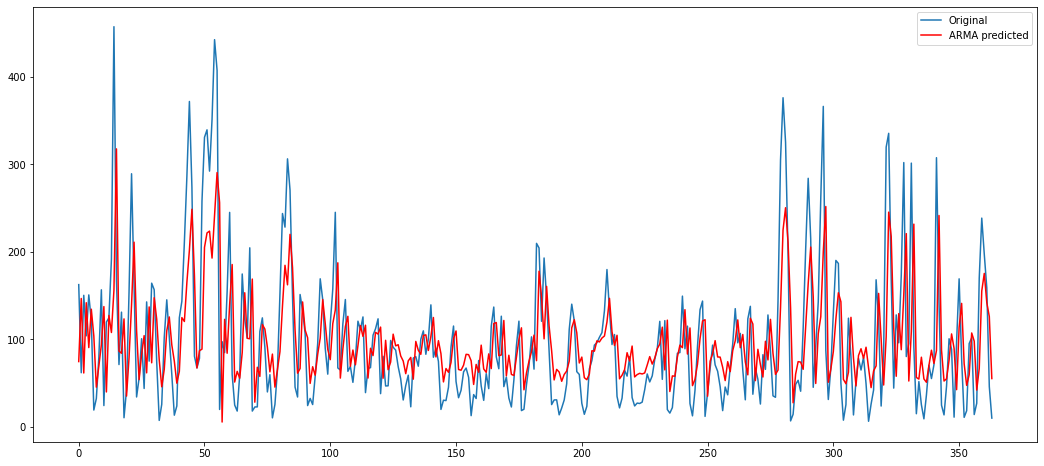

In [29]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='ARMA predicted')
plt.legend()

# Moving Average (MA)
La méthode de la moyenne mobile (MA) modélise l'étape suivante de la séquence comme la moyenne d'une fenêtre d'observations à des étapes de temps antérieures. Paramètres du modèle :

* <font color = 'green'>Number of MA (Moving Average) terms (q)</font>: q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

Nous pouvons ajuster le modèle de moyenne mobile simple (MA) en utilisant arima(…, order = c(0, 0, 1)). Notez pour référence qu'un modèle MA est un modèle ARIMA (0, 0, 1).


# Results analysis and discussion

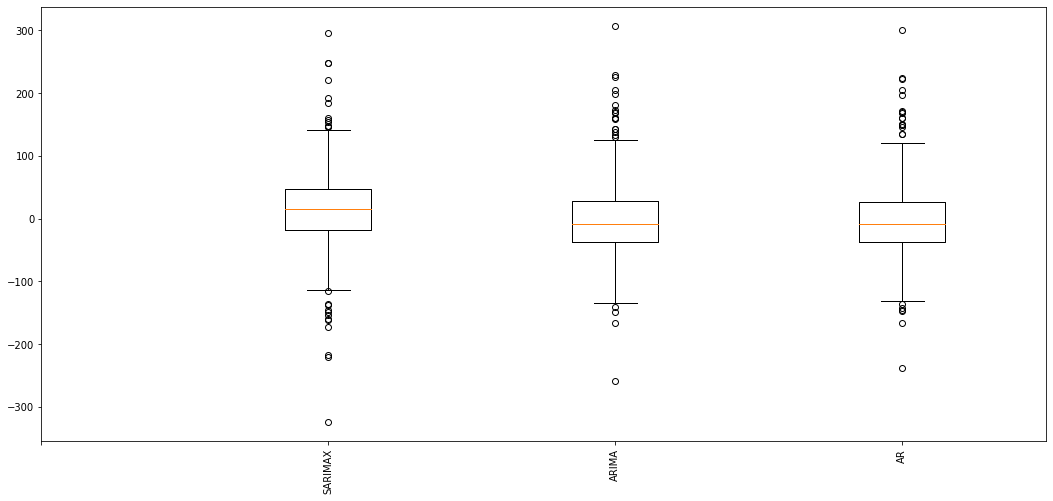

In [30]:
residuals = [df_test.pollution_today.values - predictionsDict[u]
             for u in predictionsDict.keys()]
residuals.reverse()
plt.boxplot(residuals)
ticks = list(predictionsDict.keys())
ticks.reverse()
ticks = [''] + ticks
rang = range(0, len(ticks))
plt.xticks(rang, ticks, rotation='vertical')
pass


# <font color = 'red'> Conclusion </font>

La première et la plus évidente leçon de ce projet devrait être l'importance des fonctionnalités supplémentaires pour décrire votre série chronologique. Nous avons vu comment la plupart des modèles qui ont utilisé les données supplémentaires surpassent les statistiques traditionnelles pour les séries chronologiques univariées. Il convient également de mentionner l'importance de faire une analyse approfondie de notre série pour détecter la stationnarité ou les saisonnalités spéciales qui peuvent nous obliger à appliquer une transformation à la série et détermineront probablement notre sélection de modèle. La sélection à l'aveugle des modèles ne devrait jamais être le cas et nous devrions toujours viser une bonne compréhension de notre série.
